Assignment 3
Nidhi Ann Alex
21BPS1009

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import seaborn as sns

import matplotlib.pyplot as plt

load dataset

In [ ]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


perform visualisations

univariate analysis

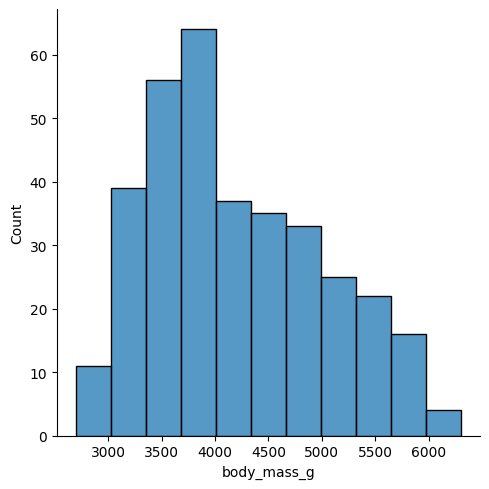

In [ ]:
sns.displot(df.body_mass_g)

In [ ]:
summary_stats = df.describe()
summary_stats

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


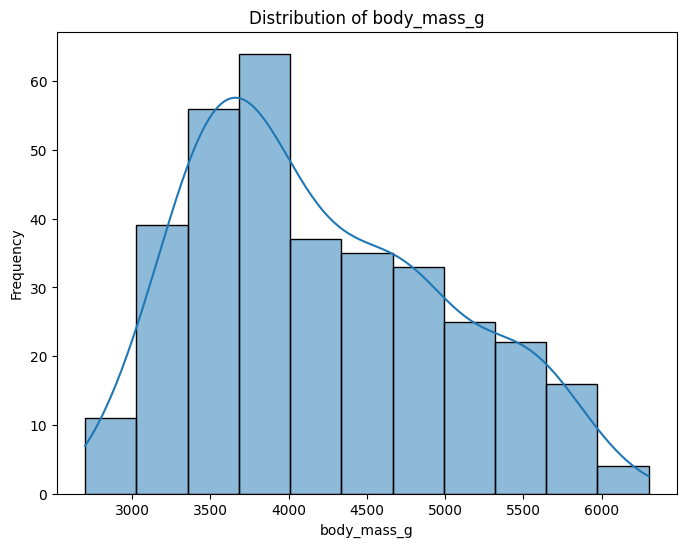

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['body_mass_g'], kde=True)
plt.xlabel('body_mass_g')
plt.ylabel('Frequency')
plt.title('Distribution of body_mass_g')
plt.show()


bi-variate analysis

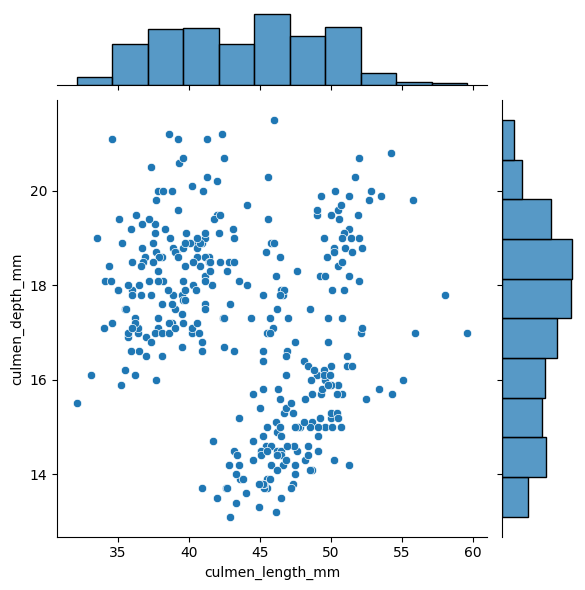

In [ ]:
sns.jointplot(x='culmen_length_mm',y='culmen_depth_mm',data=df)

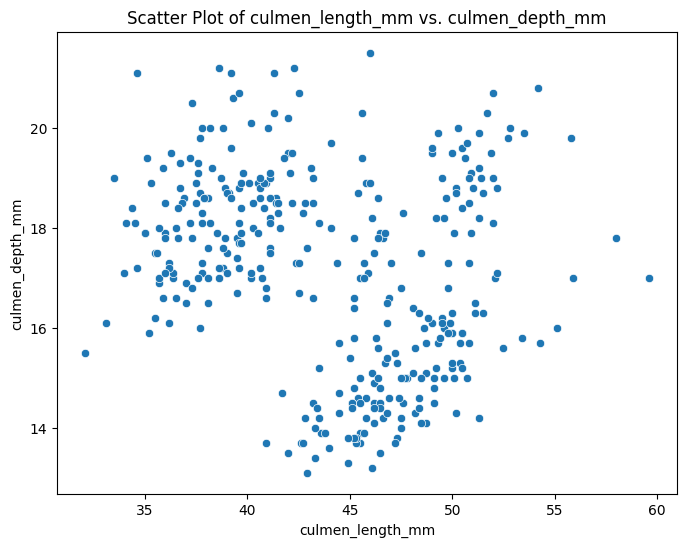

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('Scatter Plot of culmen_length_mm vs. culmen_depth_mm')
plt.show()


multi variate analysis

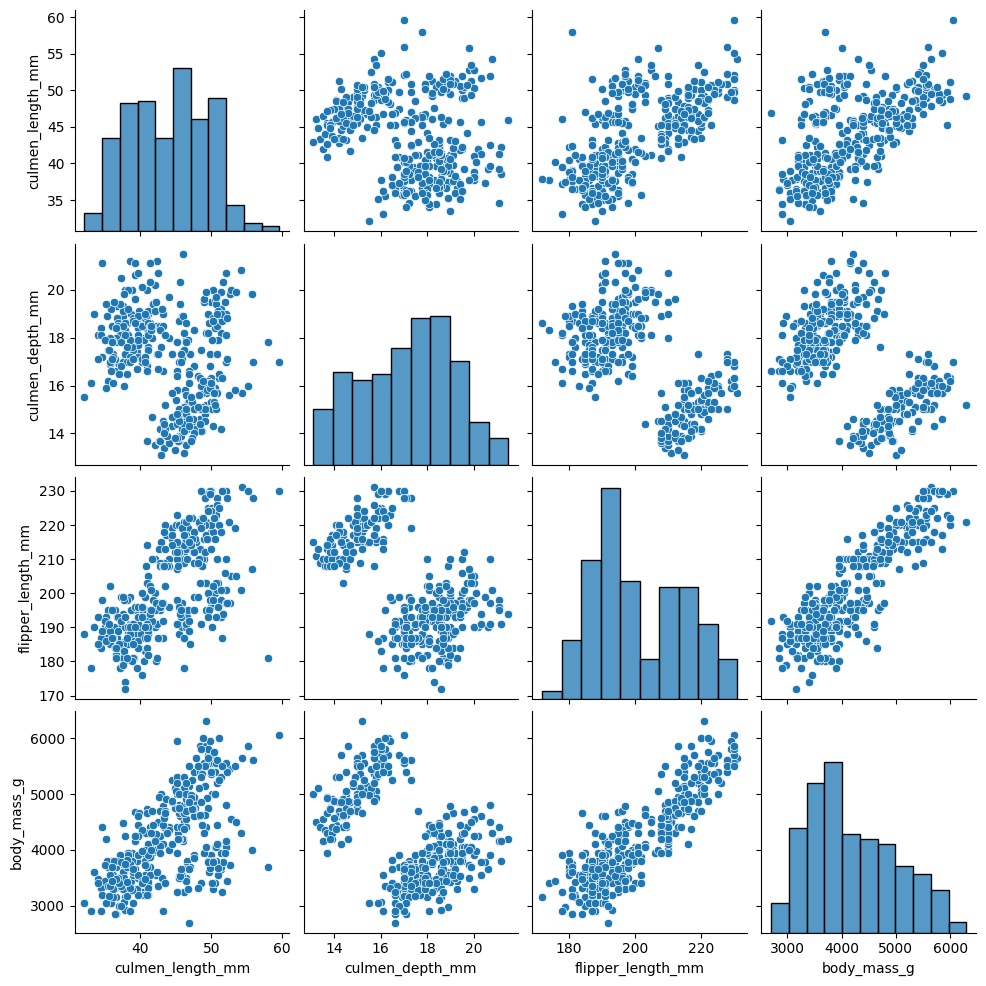

In [ ]:
sns.pairplot(df)

 Perform descriptive statistics on the dataset.

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


 Check for Missing values and deal with them


In [ ]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# Impute missing values with the mean for numerical columns
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values with the most frequent value for categorical columns (e.g., 'Sex' column)
categorical_cols = ['sex']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


Find the outliers and replace them outliers

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4201.754386,2
340,2,0,46.80000,14.30000,215.000000,4850.000000,1
341,2,0,50.40000,15.70000,222.000000,5750.000000,2
342,2,0,45.20000,14.80000,212.000000,5200.000000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


In [ ]:
df.nunique()

species                3
island                 3
culmen_length_mm     165
culmen_depth_mm       81
flipper_length_mm     56
body_mass_g           95
sex                    3
dtype: int64

using quartile method

<generator object DataFrame.items at 0x7b84d4304eb0>


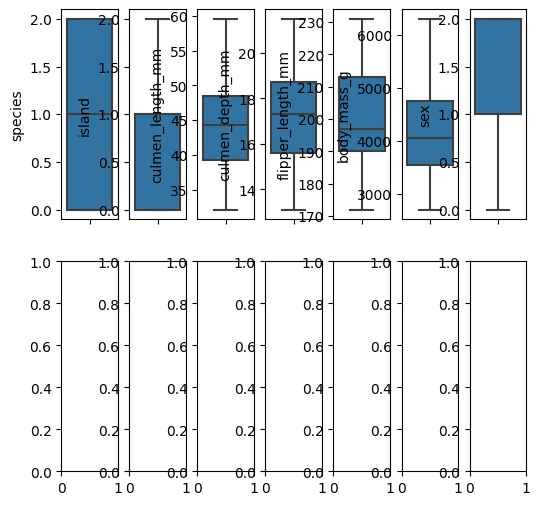

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(6,6))
index = 0
axs = axs.flatten()
print(df.items())
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1

percentage of data that belongs to outliers

In [ ]:
lower_bound=0
upper_bound=0
for k, v in df.items():
        quantile_1 = v.quantile(0.25)
        quantile_3 = v.quantile(0.75)
        inter_quantile_range = quantile_3 - quantile_1
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)]
        percentage_of_outliers = np.shape(v_col)[0] / np.shape(df)[0]
        print(k,end=" : ")
        print(percentage_of_outliers*100)

species : 0.0
island : 0.0
culmen_length_mm : 0.0
culmen_depth_mm : 0.0
flipper_length_mm : 0.0
body_mass_g : 0.0
sex : 0.0


replace it by median

In [ ]:
lower_bound_cl=0
upper_bound_cl=0

lower_bound_fl=0
upper_bound_fl=0

lower_bound_bm=0
upper_bound_bm=0
for k, v in df.items():
        quantile_1 = v.quantile(0.25)
        quantile_3 = v.quantile(0.75)
        inter_quantile_range = quantile_3 - quantile_1
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)]
        if(k=='culmen_length_mm'):
          lower_bound_cl=quantile_1-1.5*inter_quantile_range
          upper_bound_cl=quantile_3+1.5*inter_quantile_range
        elif(k=='flipper_length_mm'):
          lower_bound_fl=quantile_1-1.5*inter_quantile_range
          upper_bound_fl=quantile_3+1.5*inter_quantile_range
        elif(k=='body_mass_g'):
          lower_bound_bm=quantile_1-1.5*inter_quantile_range
          upper_bound_bm=quantile_3+1.5*inter_quantile_range

In [ ]:
for i in range(0,len(df['body_mass_g'])):
  df['culmen_length_mm'][i]=df['culmen_length_mm'][i] if df['culmen_length_mm'][i]>lower_bound_cl and df['culmen_length_mm'][i]<upper_bound_cl else df['culmen_length_mm'].median()
  df['flipper_length_mm'][i]=df['flipper_length_mm'][i] if df['flipper_length_mm'][i]>lower_bound_fl and df['flipper_length_mm'][i]<upper_bound_fl else df['flipper_length_mm'].median()
  df['body_mass_g'][i]=df['body_mass_g'][i] if df['body_mass_g'][i]>lower_bound_bm and df['body_mass_g'][i]<upper_bound_bm else df['body_mass_g'].median()

<ipython-input-35-4e62dda334df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culmen_length_mm'][i]=df['culmen_length_mm'][i] if df['culmen_length_mm'][i]>lower_bound_cl and df['culmen_length_mm'][i]<upper_bound_cl else df['culmen_length_mm'].median()
<ipython-input-35-4e62dda334df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flipper_length_mm'][i]=df['flipper_length_mm'][i] if df['flipper_length_mm'][i]>lower_bound_fl and df['flipper_length_mm'][i]<upper_bound_fl else df['flipper_length_mm'].median()
<ipython-input-35-4e62dda334df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
lower_bound=0
upper_bound=0
for k, v in df.items():
        quantile_1 = v.quantile(0.25)
        quantile_3 = v.quantile(0.75)
        inter_quantile_range = quantile_3 - quantile_1
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)]
        percentage_of_outliers = np.shape(v_col)[0] / np.shape(df)[0]
        print(k,end=" : ")
        print(percentage_of_outliers*100)

species : 0.0
island : 0.0
culmen_length_mm : 0.0
culmen_depth_mm : 0.0
flipper_length_mm : 0.0
body_mass_g : 0.0
sex : 0.0


Check the correlation of independent variables with the target

In [ ]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726,-0.003823
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.013369
culmen_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.317298
culmen_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.358666
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.227461
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.393681
sex,-0.003823,0.013369,0.317298,0.358666,0.227461,0.393681,1.000000


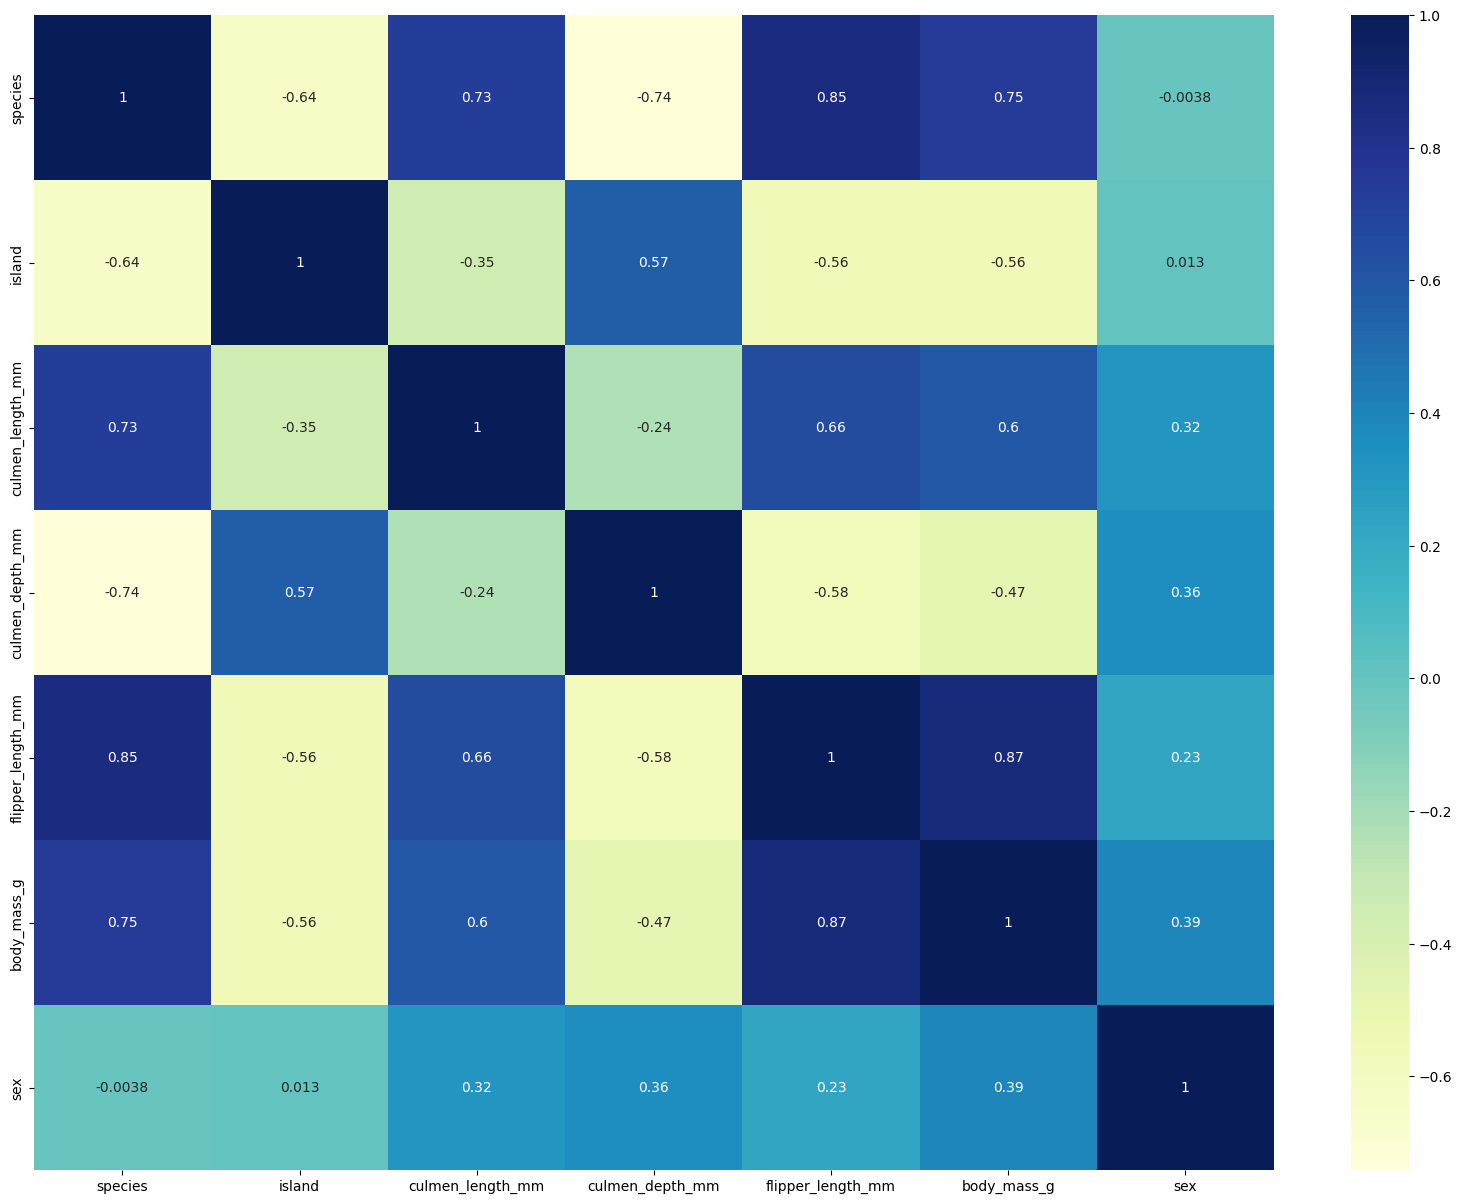

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

Check for categorical columns and perform encoding

In [ ]:
# 'Island' and 'Sex' appear to be categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

Split the data into dependent and independent variables

In [ ]:
# Assuming 'Species' is your target variable
y = df['species']

# Assuming all other columns except 'Species' are your feature variables
X = df.drop(['species'], axis=1)

Scaling the data

In [ ]:
#Standardization (Z-score normalization):
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the feature data
X_scaled = scaler.fit_transform(X)


In [ ]:
#Min-Max Scaling (Normalization):
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the feature data
X_scaled = scaler.fit_transform(X)


Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# You can adjust the 'test_size' parameter to change the split ratio as needed.
# 'random_state' is set for reproducibility; you can change it or remove it.


check the training and testing data shape

In [ ]:
# Check the shape of the training data
print("Training data shape (X_train):", X_train.shape)
print("Training data shape (y_train):", y_train.shape)

# Check the shape of the testing data
print("Testing data shape (X_test):", X_test.shape)
print("Testing data shape (y_test):", y_test.shape)


Training data shape (X_train): (275, 6)
Training data shape (y_train): (275,)
Testing data shape (X_test): (69, 6)
Testing data shape (y_test): (69,)
